In [4]:
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.transform
import requests
import PIL
from io import BytesIO
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import os

import keras
%matplotlib inline

In [5]:
dir_name = '/Users/Htoo Min/Documents/GitHub/PizzaPie/Test'
for photos in os.listdir(dir_name):
    print(photos)

pizza_0000.jpg
pizza_0001.jpg
pizza_0002.jpg
pizza_0003.jpg
pizza_0004.jpg
pizza_0005.jpg
pizza_0006.jpg
pizza_0007.jpg
pizza_0008.jpg
pizza_0009.jpg
pizza_0010.jpg
pizza_0011.jpg
pizza_0012.jpg
pizza_0013.jpg
pizza_0014.jpg
pizza_0015.jpg
pizza_0016.jpg
pizza_0017.jpg
pizza_0018.jpg
pizza_0019.jpg
pizza_0020.jpg
pizza_0021.jpg
pizza_0022.jpg
pizza_0023.jpg
pizza_0024.jpg
pizza_0025.jpg
pizza_0026.jpg
pizza_0027.jpg
pizza_0028.jpg
pizza_0029.jpg
pizza_0030.jpg
pizza_0031.jpg
pizza_0032.jpg
pizza_0033.jpg
pizza_0034.jpg
pizza_0035.jpg
pizza_0036.jpg
pizza_0037.jpg
pizza_0038.jpg
pizza_0039.jpg
pizza_0040.jpg
pizza_0041.jpg
pizza_0042.jpg
pizza_0043.jpg
pizza_0044.jpg
pizza_0045.jpg
pizza_0046.jpg
pizza_0047.jpg
pizza_0048.jpg
pizza_0049.jpg
pizza_0050.jpg
pizza_0051.jpg
pizza_0052.jpg
pizza_0053.jpg
pizza_0054.jpg
pizza_0055.jpg
pizza_0056.jpg
pizza_0057.jpg
pizza_0058.jpg
pizza_0059.jpg
pizza_0060.jpg
pizza_0061.jpg
pizza_0062.jpg
pizza_0063.jpg
pizza_0064.jpg
pizza_0065.jpg
pizza_0066

In [17]:
import os
dir_exists = os.path.isdir(dir_name)
if not dir_exists:
    os.mkdir(dir_name)
    print("Making directory %s" % dir_name)
else:
    print("Will store images in directory %s" % dir_name)

Will store images in directory /Users/Htoo Min/Documents/GitHub/PizzaPie/Test


In [18]:
# Select 'xception' or 'vgg16'
pre_trained = 'vgg16'

# Load appropriate packages
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
if pre_trained == 'xception':
    from keras.applications.xception import decode_predictions, preprocess_input
elif pre_trained == 'vgg16':
    from keras.applications.vgg16 import decode_predictions, preprocess_input    
else:
    raise Exception("Unknown model")

In [19]:
if pre_trained == 'xception':
    model = Xception(weights='imagenet',input_shape=(299,299,3))
else:
    model = VGG16(weights='imagenet')

In [20]:
model.input_shape

(None, 224, 224, 3)

In [21]:
batch_size = 210
nrow = model.input_shape[1]
ncol = model.input_shape[2]
nchan = model.input_shape[3]
batch_shape = (batch_size,nrow,ncol,nchan)
x = np.zeros(batch_shape)

In [22]:
dir_name = 'Test'
class_name = 'pizza'
for i in range(batch_size):
    fn = '{0:s}/{1:s}_{2:04d}.jpg'.format(dir_name,class_name, i)  
    x[i,:,:,:] = image.load_img(fn, target_size=(nrow, ncol))

In [9]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

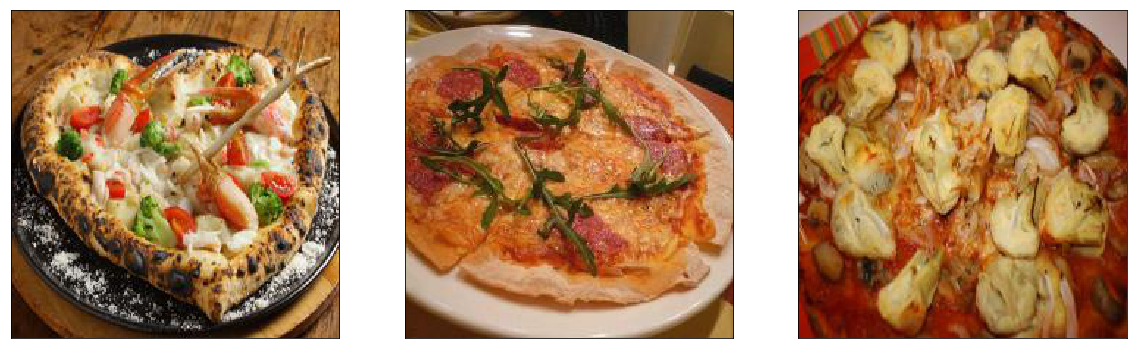

In [10]:
plt.figure(figsize=(20,20))
nplot = 3
for i in range(nplot):    
    plt.subplot(1,nplot,i+1)
    disp_image(x[i,:,:,:])

In [12]:
x = preprocess_input(x)

In [14]:
preds = model.predict(x)
preds_decoded = decode_predictions(preds,top=3)

In [15]:
ntop = 3
res_dict = {}
for i in range(ntop):
    class_name = []
    class_prob = []
    for j in range(batch_size):
        class_name.append(preds_decoded[j][i][1])
        

    name_col = str('class %d' % i)
    prob_col = str('prob %d' % i)
    res_dict[name_col] = class_name
    res_dict[prob_col] = class_prob
    
df = pd.DataFrame(data=res_dict)

ValueError: arrays must all be same length

In [16]:
print(df)

         class 0      class 1        class 2    prob 0    prob 1    prob 2
0          pizza    meat_loaf        toaster  0.583333  0.127287  0.090634
1          pizza       potpie     frying_pan  0.938192  0.035472  0.006810
2          pizza       bakery          bagel  0.999202  0.000482  0.000100
3          pizza    meat_loaf    French_loaf  0.891117  0.060124  0.013572
4          pizza  pomegranate      soup_bowl  0.997759  0.000598  0.000450
5          pizza       potpie     frying_pan  0.954666  0.019785  0.005021
6     frying_pan        pizza            wok  0.233225  0.191212  0.079625
7          pizza        bagel          plate  0.818519  0.108147  0.017821
8          pizza       trifle      meat_loaf  0.991228  0.001781  0.001161
9          pizza   frying_pan     Dutch_oven  0.998062  0.000778  0.000350
10         pizza      burrito         potpie  0.959301  0.026968  0.003779
11         pizza       hotdog          plate  0.919092  0.018474  0.008398
12         pizza        p